# Error Analysis - Regression

By: Jimuel Celeste, Jr. 

Objective: To analyze the errors of the regression model.

In [1]:
import os 
import pickle 

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_context('paper')
sns.set_style('ticks')

## BERT + Standard Scaler + Principal Component Analysis + SVM

In [3]:
model = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Machine Learning/Regression/Nested Cross-Validation/BERT/svm_regressor/final_model/model.pkl'
with open(model, 'rb') as f:
    pipe = pickle.load(f)
pipe

Pipeline(steps=[('feature_scaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('model', SVR(C=100, gamma=0.001))])

## Absolute Error

In [4]:
input_dir = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Machine Learning/Regression/Nested Cross-Validation/BERT/svm_regressor'

preds_arr = []
folds = 5
for fold in range(folds):
    pred_file = os.path.join(input_dir, f"fold_{fold}", "outer_validation_predictions.csv")
    preds = pd.read_csv(pred_file)
    preds_arr.append(preds)
preds_df = pd.concat(preds_arr)
preds_df['record_id'] = preds_df['filename'].apply(lambda x: x.split('.')[0])
preds_df

,filename,predictions,labels,record_id
0,S003.csv,31.650874,29.0,S003
1,S011.csv,28.348545,30.0,S011
2,S019.csv,27.697348,27.0,S019
3,S025.csv,27.367857,28.0,S025
4,S036.csv,27.085447,28.0,S036
...,...,...,...,...
88,adrso304.csv,28.170260,30.0,adrso304
89,adrso309.csv,28.377027,30.0,adrso309
90,adrso312.csv,25.296592,29.0,adrso312
91,adrso315.csv,28.185011,28.0,adrso315


In [5]:
# linking with metadata
metadata_csv = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Features/Thesis - wav2vec Features/metadata_cv_english.csv'
metadata = pd.read_csv(metadata_csv)
metadata

,filename,record_id,subject_id,age,sex,educ,mmse,dx,dx_binary,dataset,language
0,S002.csv,S002,S002,62.0,F,NaN,30.0,NC,0,ADReSS,en
1,S003.csv,S003,S003,69.0,F,NaN,29.0,NC,0,ADReSS,en
2,S004.csv,S004,S004,71.0,F,NaN,30.0,NC,0,ADReSS,en
3,S005.csv,S005,S005,74.0,F,NaN,30.0,NC,0,ADReSS,en
4,S006.csv,S006,S006,67.0,F,NaN,29.0,NC,0,ADReSS,en
...,...,...,...,...,...,...,...,...,...,...,...
457,adrso313.csv,adrso313,adrso313,63.0,F,13.0,28.0,NC,0,ADReSS-M,en
458,adrso314.csv,adrso314,adrso314,61.0,F,12.0,29.0,NC,0,ADReSS-M,en
459,adrso315.csv,adrso315,adrso315,58.0,M,NaN,28.0,NC,0,ADReSSo,en
460,adrso316.csv,adrso316,adrso316,56.0,M,NaN,30.0,NC,0,ADReSSo,en


In [6]:
def label_age_group(x):
    label = ''
    if x < 50:
        label = '<50'
    elif 50 <= x < 60:
        label = '50-59'
    elif 60 <= x < 70:
        label = '60-69'
    elif 70 <= x < 80:
        label = '70-79'
    elif 80 <= x < 90:
        label = '80-89'
    elif x >= 90:
        label = '90+'
    return label
        
df = pd.merge(left=preds_df.copy(deep=True), right=metadata, on='record_id')
df['error'] = df['labels'] - df['predictions']
df['absolute_error'] = np.abs(df['error'])
df['age_group'] = df['age'].apply(lambda x: label_age_group(x) if x else x)
df

,filename_x,predictions,labels,record_id,filename_y,subject_id,age,sex,educ,mmse,dx,dx_binary,dataset,language,error,absolute_error,age_group
0,S003.csv,31.650874,29.0,S003,S003.csv,S003,69.0,F,NaN,29.0,NC,0,ADReSS,en,-2.650874,2.650874,60-69
1,S011.csv,28.348545,30.0,S011,S011.csv,S011,70.0,F,NaN,30.0,NC,0,ADReSS,en,1.651455,1.651455,70-79
2,S019.csv,27.697348,27.0,S019,S019.csv,S019,57.0,F,NaN,27.0,NC,0,ADReSS,en,-0.697348,0.697348,50-59
3,S025.csv,27.367857,28.0,S025,S025.csv,S025,67.0,F,NaN,28.0,NC,0,ADReSS,en,0.632143,0.632143,60-69
4,S036.csv,27.085447,28.0,S036,S036.csv,S036,73.0,M,NaN,28.0,NC,0,ADReSS,en,0.914553,0.914553,70-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,adrso304.csv,28.170260,30.0,adrso304,adrso304.csv,adrso304,70.0,M,12.0,30.0,NC,0,ADReSS-M,en,1.829740,1.829740,70-79
458,adrso309.csv,28.377027,30.0,adrso309,adrso309.csv,adrso309,54.0,F,NaN,30.0,NC,0,ADReSSo,en,1.622973,1.622973,50-59
459,adrso312.csv,25.296592,29.0,adrso312,adrso312.csv,adrso312,67.0,F,NaN,29.0,NC,0,ADReSSo,en,3.703408,3.703408,60-69
460,adrso315.csv,28.185011,28.0,adrso315,adrso315.csv,adrso315,58.0,M,NaN,28.0,NC,0,ADReSSo,en,-0.185011,0.185011,50-59


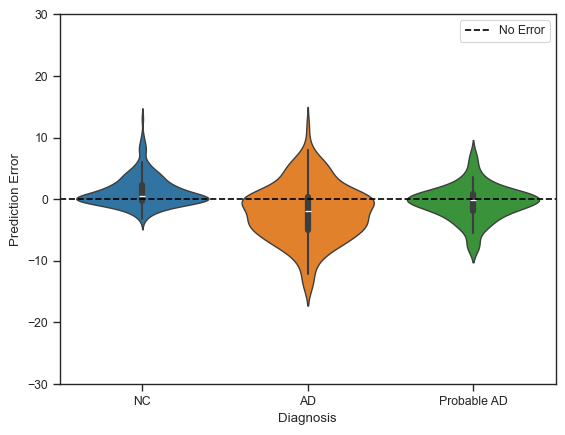

In [7]:
sns.violinplot(df, x='dx', y='error', hue='dx')
plt.ylim(-30,30)
plt.ylabel("Prediction Error")
plt.xlabel("Diagnosis")
plt.axhline(y=0, color='black', linestyle='--', label='No Error')
plt.legend()

output_dir = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Analysis/regression'
output_file = os.path.join(output_dir, 'reg_best_model_cv_error.png')
plt.savefig(output_file, bbox_inches='tight', dpi=300)

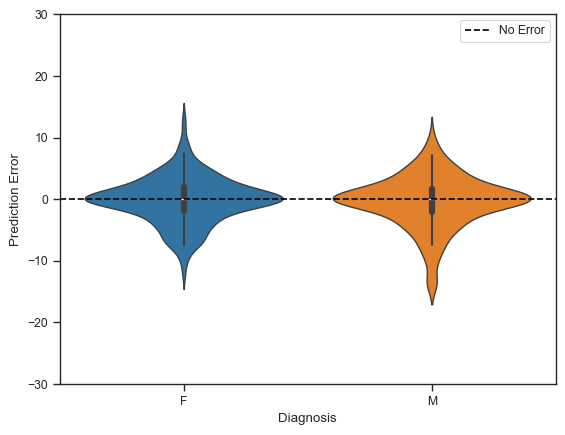

In [8]:
sns.violinplot(df.dropna(subset=['age', 'sex']), x='sex', y='error', hue='sex')#, hue='dx')
plt.ylim(-30,30)
plt.ylabel("Prediction Error")
plt.xlabel("Diagnosis")
plt.axhline(y=0, color='black', linestyle='--', label='No Error')
plt.legend()

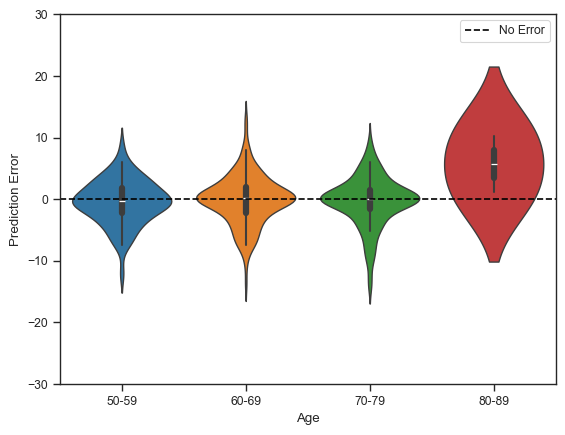

In [9]:
# plt.figure(figsize=(10,5))
hue_order = ['50-59', '60-69', '70-79', '80-89']
ax = sns.violinplot(
        df.dropna(subset=['age', 'sex']).sort_values(by='age'), 
        x='age_group', y='error', hue='age_group'
    )
plt.ylim(-30,30)
plt.ylabel("Prediction Error")
plt.xlabel("Age")
plt.axhline(y=0, color='black', linestyle='--', label='No Error')
plt.legend()
# plt.xticks(hue_order)

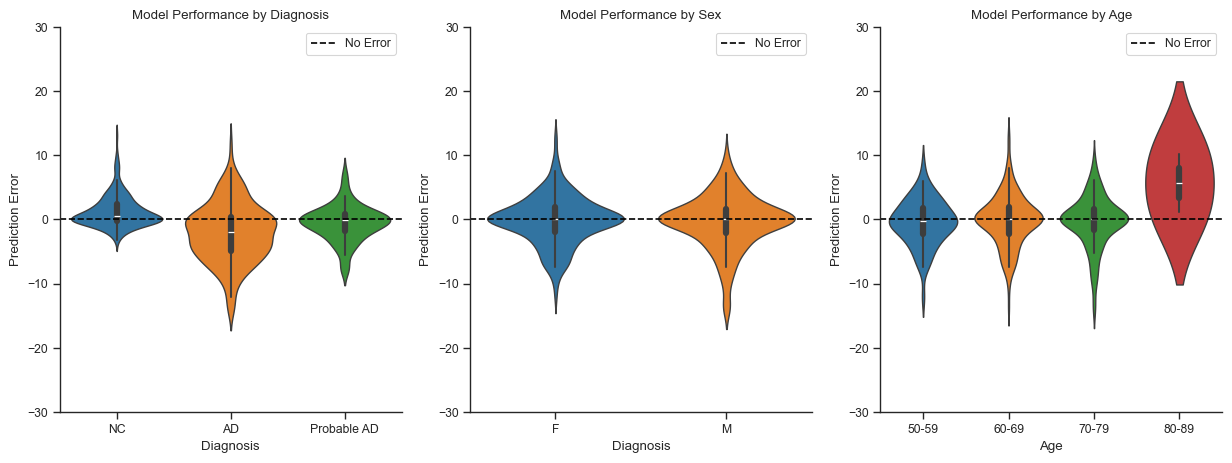

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

sns.violinplot(df, x='dx', y='error', hue='dx', ax=axs[0])
axs[0].set_ylim(-30,30)
axs[0].set_ylabel("Prediction Error")
axs[0].set_xlabel("Diagnosis")
axs[0].axhline(y=0, color='black', linestyle='--', label='No Error')
axs[0].legend()
axs[0].set_title('Model Performance by Diagnosis')

sns.violinplot(df.dropna(subset=['age', 'sex']), x='sex', y='error', hue='sex', ax=axs[1])
axs[1].set_ylim(-30,30)
axs[1].set_ylabel("Prediction Error")
axs[1].set_xlabel("Diagnosis")
axs[1].axhline(y=0, color='black', linestyle='--', label='No Error')
axs[1].legend()
axs[1].set_title('Model Performance by Sex')

# plt.figure(figsize=(10,5))
hue_order = ['50-59', '60-69', '70-79', '80-89']
sns.violinplot(
        df.dropna(subset=['age', 'sex']).sort_values(by='age'), 
        x='age_group', y='error', hue='age_group', ax=axs[2])
axs[2].set_ylim(-30,30)
axs[2].set_ylabel("Prediction Error")
axs[2].set_xlabel("Age")
plt.axhline(y=0, color='black', linestyle='--', label='No Error')
axs[2].legend()
axs[2].set_title('Model Performance by Age')

sns.despine()

output_file = os.path.join(output_dir, 'reg_best_model_cv_error_analysis.png')
plt.savefig(output_file, bbox_inches='tight', dpi=300)